In [3]:
import numpy as np
import h5py
import sys
sys.path.append('/Users/eframe/dmi/src')
# import calibrate as calib
# import eventAnalysis as ea
import tables
import matplotlib.pyplot as plt
# import codedAperture as ca
import glob
import tables
from scipy import ndimage
import more_itertools as mit
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.font_manager import FontProperties

In [4]:
(1.3-2.3)/2.3

-0.4347826086956521

In [5]:
(1.7-0.79)/1.7

0.5352941176470588

In [6]:
50/95.+1

1.526315789473684

In [8]:
res = np.tan(3.7 * np.pi / 180 / 2) * 2 * 20
sig = res / 2.355
print(sig, res)

0.5486168441673048 1.2919926680140028


In [9]:
m = 1.53
wd = 2
wm = 2
res = 1 / ( m - 1 ) * np.sqrt( ( m * wm ) ** 2 + wd ** 2 )
sig = res / 2.355
print(sig, res)

2.9288353174049258 6.8974071724886


In [10]:
def gauss(x, h, mu, sig):
    """ Gaussian function
    """
    return h*np.exp(-0.5*((x-mu)/sig)**2)

In [11]:
# Loading Image Data
f = tables.open_file('/Users/eframe/Downloads/phantom_coded_new_250.h5', 'r')
src = f.root.image.read() 
f.close()

In [16]:
49*49*49

117649

In [13]:
# Reshaping Image Data into 3D Image
binSize = 2
sourceX, sourceY, sourceZ = np.mgrid[ -25:26:binSize, -16:17:binSize, -25:26:binSize ]
#sourceX, sourceY, sourceZ = np.mgrid[ -29:31:binSize, -29:31:binSize, -29:31:binSize ]
vals = ( src.reshape( sourceX.shape ) / max(src) )
vals.shape

ValueError: cannot reshape array of size 90569 into shape (26,17,26)

0


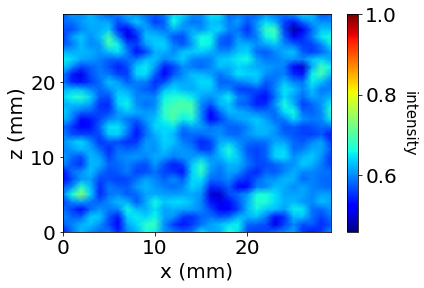

1


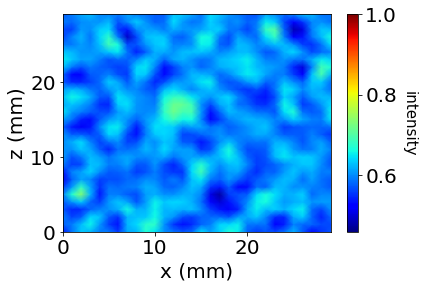

2


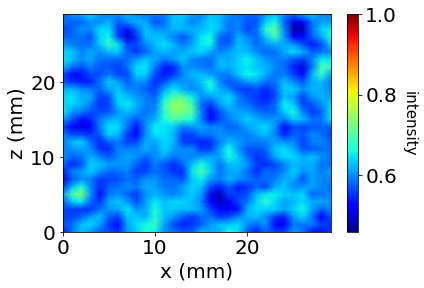

3


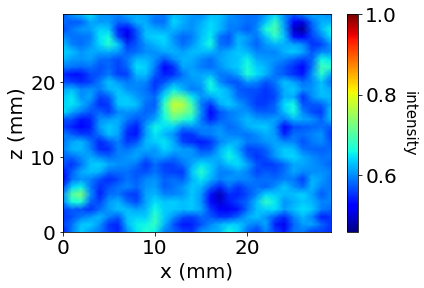

4


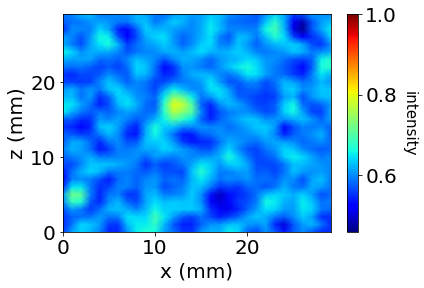

5


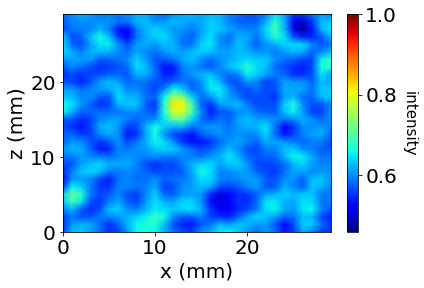

6


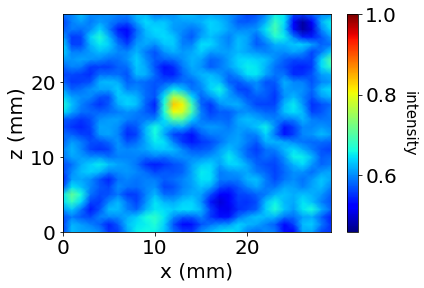

7


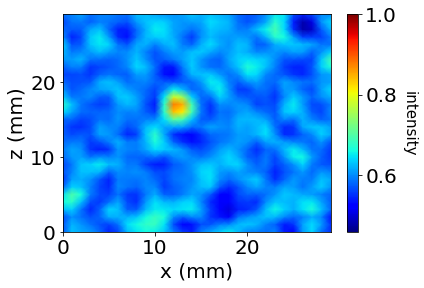

8


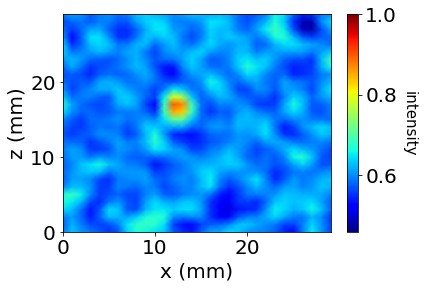

9


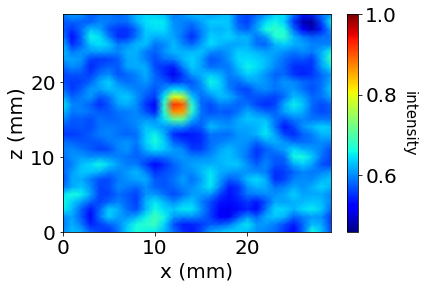

10


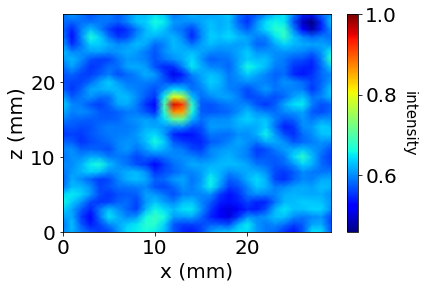

11


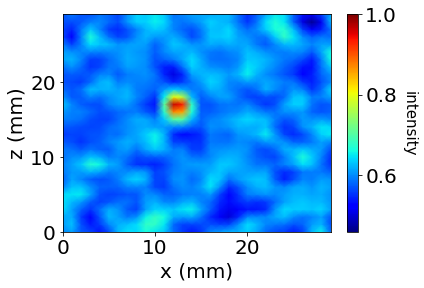

12


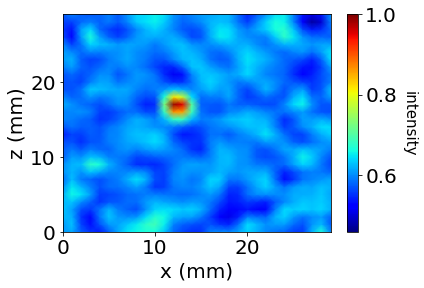

13


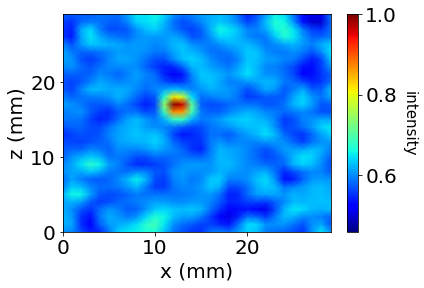

14


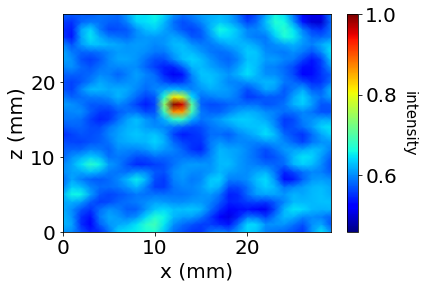

15


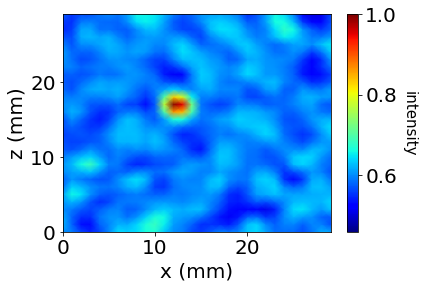

16


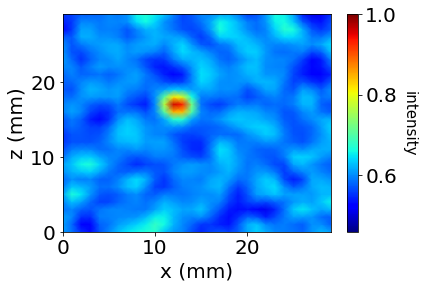

17


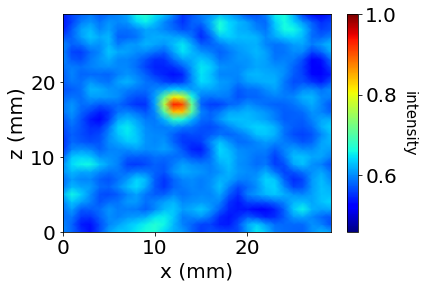

18


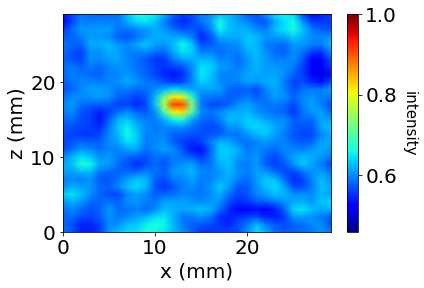

19


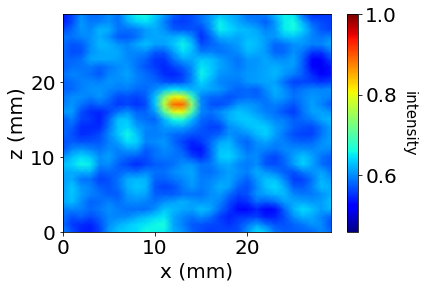

20


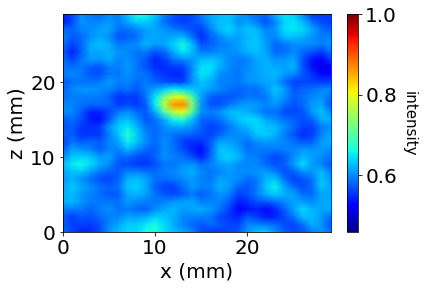

21


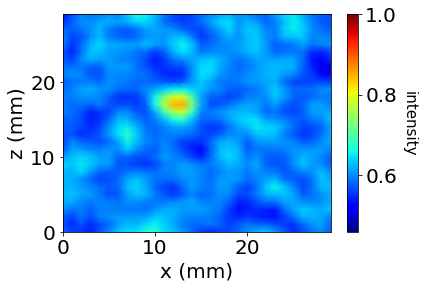

22


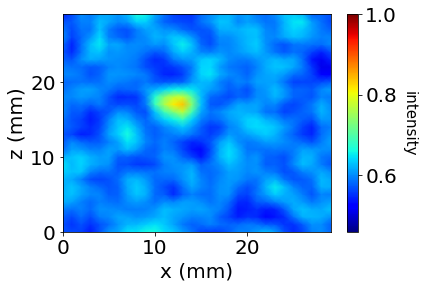

23


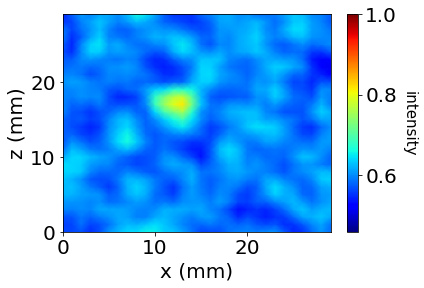

24


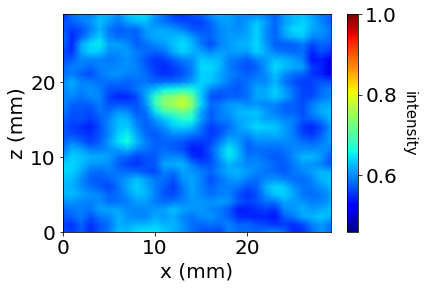

25


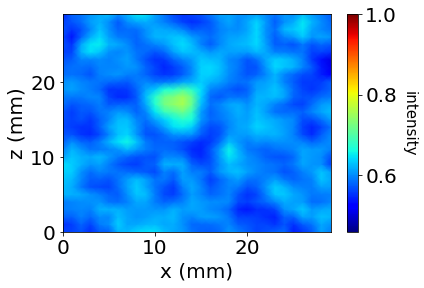

26


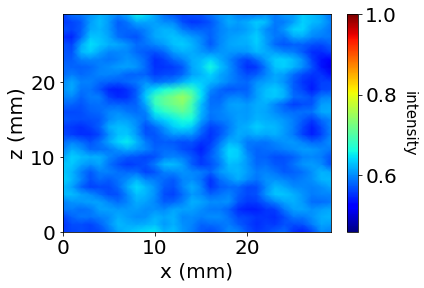

27


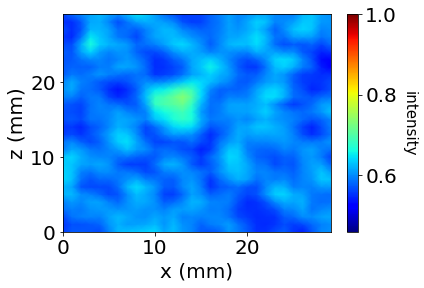

28


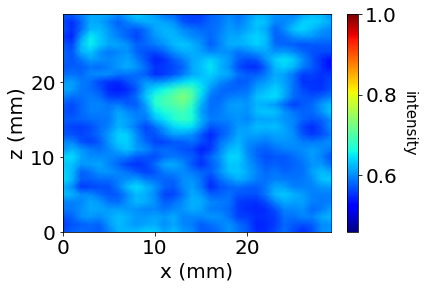

29


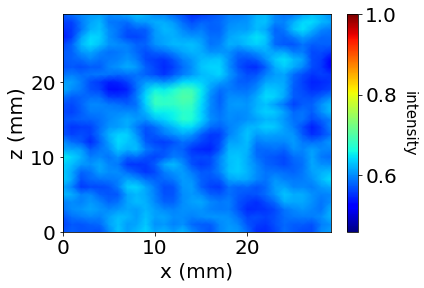

In [191]:
# Plotting 2D projections of Image
%matplotlib inline
depth = np.array( sourceZ[:,0][0] )
a, b = min(vals.flatten()), max(vals.flatten())
for i in np.arange( sourceZ.shape[2] ):
    fig, ax = plt.subplots()
    grid = vals[ :, :, i]
    im = ax.pcolormesh( grid.T, vmin=a, vmax=b, cmap='jet', shading = 'gouraud' ) 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'z (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    cbar.set_label( label = 'intensity', rotation = 270, fontsize = 15, labelpad = 20 )
    cbar.ax.tick_params( labelsize = 20 )
    print(i)
    plt.show()

In [192]:
vals[12, :, 15].argmax()

17

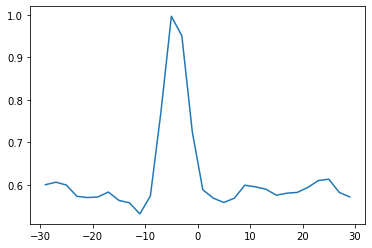

In [193]:
%matplotlib inline
x, y, z = 12, 17, 15

y_val, y_coord = vals[ :, :, z][x, :], sourceY[:, :, z][x, :]
x_val, x_coord = vals[ :, :, z][:, y], sourceX[:, :, z][:, y]
z_val, z_coord = vals[ :, y, :][x, :], sourceZ[:,y,:][x, :]
plt.plot(x_coord, x_val, '-' )
plt.show()

In [194]:
val, coord, ii = x_val, x_coord, x
baseline = ( np.mean( val[:9] ) + np.mean( val[17:] ) ) / 2
print(baseline)

0.5834251700457986


In [195]:
popt, pcov = curve_fit( gauss, coord, 
                       val - baseline, p0 = [ 1, -5, sig ] )
gauss_curve = gauss( np.arange( min(coord), max(coord), 0.1 ), popt[0], popt[1], popt[2] )

In [196]:
FWHM = popt[2] * 2.36
print(popt[2], FWHM)

2.0227706937696603 4.773738837296398


In [197]:
# 4/3 * (4.6/2)**3 * np.pi

In [198]:
diameter = 2
K = np.sqrt(3) / 6
# K = np.sqrt(5) / 10
res = 2.36 * np.sqrt( ( popt[2] ) ** 2 - ( diameter * K ) ** 2 ) 
res 

4.575155642530496

In [199]:
%matplotlib qt
m = 2
font = FontProperties()
font.set_name('Times New Roman')
fig, ax = plt.subplots()
ax.set_xlabel('Distance from FoV Center [mm]', fontsize=50, fontproperties=font, labelpad=5)
ax.set_ylabel('Relative Intensity', fontsize=50, fontproperties=font)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='in', labelsize=50)
ax.tick_params(which='minor', length=5, width=2, direction='in')

ax.plot( coord, val, 'o', color='tab:blue', markersize=12, label=r'Back-projected' + '\n' + 'Intensity')
ax.plot(np.arange(min(coord), max(coord), 0.1), 
        gauss_curve + baseline, 'tab:blue', linewidth=4, label='1D Gaussian')

ax.legend(prop={"family":"Times New Roman", 'size': 35}, loc='upper right', frameon=False)
ax.set_xlim(-15, 10)
# ax.grid(which='both')
# ax.text(0.1, 0.9, 'm=1.5', transform=ax.transAxes, 
#         fontsize=40, fontproperties=font, verticalalignment='top', 
#         weight='bold', bbox=dict(facecolor='white', edgecolor='None', pad=10))
for l in ax.xaxis.get_ticklabels():
    l.set_family("Times New Roman")
    l.set_size(50)
for l in ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
    l.set_size(50) 
plt.show()